# Blotch the image

In [116]:
from PIL import Image, ImageDraw

In [118]:
blotch_size = 5

In [119]:
def blotch(im, blotch_size=blotch_size):
    blob = Image.new('1', im.size, (1))
    draw = ImageDraw.Draw(blob)

    for y in range(im.size[1]):
        for x in range(im.size[0]):
            if im.getpixel((x, y)) < 1:
                draw.ellipse((x,y, x+blotch_size, y+blotch_size), fill=0)
    
    return blob


# Generate initial text image 

In [121]:
from PIL import Image, ImageFont, ImageDraw

In [122]:
font_size = 24
img_height_mult = 3
img_width_mult = 1

In [123]:
def text_to_image(word: str, font_name='consola.ttf', font_size=font_size):
    txt = Image.new('1', (int(font_size * len(word) * img_width_mult), font_size * img_height_mult), (1))
    font = ImageFont.truetype(font_name, font_size)
    draw = ImageDraw.Draw(txt)
    draw.text((font_size, font_size), word, font=font, fill=0)
    return txt

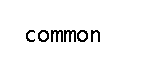

In [124]:
text_to_image('common')

# Image diff section


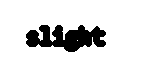

In [125]:
original = blotch(text_to_image('slight'))
original

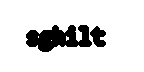

In [126]:
reordered = blotch(text_to_image('sghilt'))
reordered

In [127]:
def image_diff(original, reordered):
    diff = Image.new('1', original.size, color=1)
    for y in range(original.size[1]):
        for x in range(original.size[0]):
            if original.getpixel((x, y)) != reordered.getpixel((x, y)):
                diff.putpixel((x, y), 0)
    return diff

In [128]:
def compare_spellings(str1, str2):
    img1 = blotch(text_to_image(str1))
    img2 = blotch(text_to_image(str2))
    diff = image_diff(img1, img2)
    display(img1)
    display(img2)
    display(diff)
    return diff

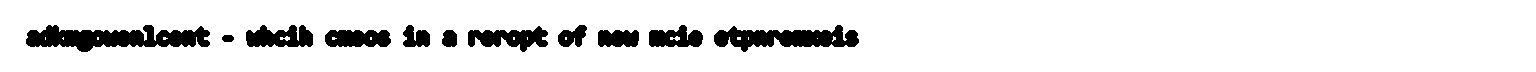

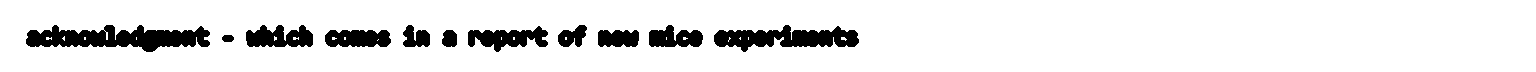

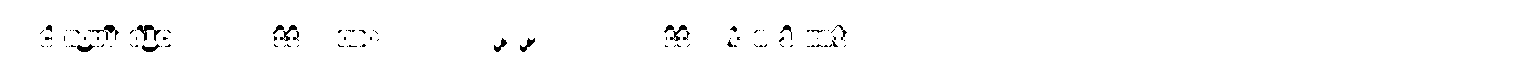

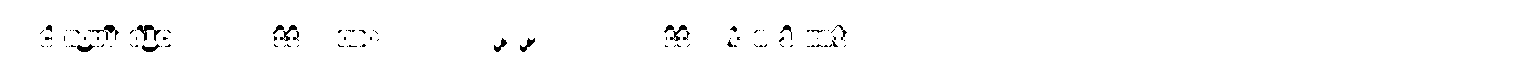

In [129]:
compare_spellings('adkmgowenlcent - whcih cmeos in a reropt of new mcie etpnremxeis', 'acknowledgment - which comes in a report of new mice experiments')

# Make it interactive

In [130]:
from ipywidgets import interact, interactive
from IPython.display import display
import ipywidgets as widgets

In [131]:
img1 = widgets.Output()


In [132]:

@interact(
    spelling1='Hello',
    spelling2='Hlelo',
    font=['arial.ttf', 'consola.ttf'],
    font_size=widgets.IntSlider(value=24, min=8, max=80, step=8, description='Font size'),
    blotch_size=widgets.IntSlider(min=1, max=font_size, step=1, value=5)
)
def regen(spelling1, spelling2, font, font_size, blotch_size):
    img1 = blotch(text_to_image(spelling1, font, font_size=font_size), blotch_size)
    img2 = blotch(text_to_image(spelling2, font, font_size=font_size), blotch_size)
    diff = image_diff(img1, img2)
    display(img1)
    display(img2)
    display(diff)


interactive(children=(Text(value='Hello', description='spelling1'), Text(value='Hlelo', description='spelling2…